# 2 site Chain - Keldysh Formalism

$H=H_0+H_I$

$H_0=\omega_e\sum_{i=1}^{N}b_i^\dagger b_i+h\sum_{i=1}^{N-1}\left(b_i^\dagger b_{i+1}+ b_{i+1}^\dagger b_{i}\right)$

$H_I=\sum_{\lambda,k}\left(\bar{g}_{\lambda,k}b_\lambda^\dagger d_{\lambda,k}+g_{\lambda,k}d_{\lambda,k}^\dagger b_\lambda\right)+\sum_{\lambda,k}\nu_{\lambda,k}d_{\lambda,k}^\dagger d_{\lambda,k}$

The propagators can then be found using Keldysh field theory and the result for the retarded propagator for this two site case is 
$$
G^R=\frac{1}{h}
\begin{pmatrix}
R_2 & 1 \\
1 & R_1 \\
\end{pmatrix}\frac{1}{R_1 R_2-1}
$$

with 
$R_j=\frac{1}{h}\left(\epsilon -\omega_c -\Sigma_j^r(\epsilon)-i\Sigma_j^i(\epsilon)\right)=\frac{1}{h}\left(a_j(\epsilon)-i b_j(\epsilon)\right)$

and

$\Sigma_j(\epsilon)=\Sigma_j^r(\epsilon)+i\Sigma_j^i(\epsilon)=\int_{0}^\infty\frac{J_{j}(\nu)}{\epsilon-\nu+i\eta}d\nu$

Here $J(\nu)$ is the spectral density for the $j$'th bath. To compute the steady state current in the system on has to compute the off-diagonal Keldysh propagator elements. Assuming the baths stay in a thermal equilibrium state the chain  Keldysh propagator element of interest is given by
$G^K_{1,2}=\frac{-i2\pi}{h^2}J(\epsilon)\left(G^R_{11}\coth(\epsilon \beta_1 /2) \bar{G}^R_{12}+G^R_{12}\coth(\epsilon \beta_2 /2) \bar{G}^R_{22}\right)$

To simplify the situation we assume that the spectral density of the two baths are identical and only their temperature differs. This means that $\Sigma_j = \Sigma
=\int_{0}^\infty\frac{J(\nu)}{\epsilon-\nu+i\eta}d\nu$. 

This leads to the retarded green funciton

$$
G^R=\frac{1}{h}
\begin{pmatrix}
R & 1 \\
1 & R \\
\end{pmatrix}\frac{1}{R^2-1}
$$

and the keldysh propagator in frequency space

$G^K_{1,2}=\frac{-i2\pi}{h^2}\frac{J(\epsilon)}{|R^2-1|^2}\Big(R\coth(\epsilon \beta_1/2)+\bar{R}\coth(\epsilon \beta_2/2)\Big)$.


As the spectral density is defined to be zero for negative frequency one can find the steady state propagator in the time domain as 
$G^K_{1,2}(t)=\int_0^\infty \frac{d\epsilon}{2\pi} \Re G^K_{1,2}(\epsilon)$

The real value enters due to the anti-hermitian property of the keldysh propagator. The real value of the keldysh propagator can then be found as
$\Re G^K_{1,2}(\epsilon)=\frac{2\pi}{h^2}\frac{J(\epsilon)b}{(a^2-b^2-1)^2+4a^2b^2}\Big(\coth(\epsilon \beta_1/2)+\coth(\epsilon \beta_2/2)\Big)$

As the integral is perfrom this is proporptional to the steady-state current. This also means that when the two environments have the same temperature there is no steady-state current as expected. We also see that if there is no imaginary part to the selfenergy then there is no current either. This makes sense as the selfenergy is waht gives dissipation and driving of the chain through the system whereas the real part mostly just renormalises the parameters.  

In [1]:
#Initialization
from numpy import (array, nonzero, real, imag, linspace, empty) 
from mpmath import coth,exp,erfi, ei, log, fp
from scipy.integrate import trapz
from math import pi
import mpmath as mp
mp.pretty = True

#%matplotlib inline
import matplotlib.pyplot as plt

In [54]:
#Spectral density
def J(v, magnitude, width):
    return mp.mpf(magnitude*v*exp(-v**2/width**2)*2/width**2)

#Flat Spectral density, where the spectral density 
#is approximated as rectangular with a non-zero range of 
#cutoff*width and an area equal to J(v) area over the same range
def Jflat(magnitude,width,cutoff):
    return magnitude*(1-exp(-cutoff**2))/(cutoff**2 *width)

#Self energy
def SE(E, magnitude, width, flat = False,cutoff=4):
    if flat == False:
        return -(exp(-E**2/width**2)*magnitude/(2*width**2))*(2*exp(E**2/width**2)*pi**(0.5)*width-2*pi*E*erfi(E/width)
                                                             -2*E*ei(E**2/width**2)-4*E*log(-E)+E*log(E**2/width**2)
                                                             +4*E*log(width)-E*log(width**2/E**2))
    elif flat == True:
        return mp.mpc(-1j *pi* Jflat(magnitude,width,cutoff))

In [ ]:
#Real part of R given in the above derivation
def RealR(E, wc, h, magnitude, width, flat=False):
    if flat == False:
        return (E - wc)/h #-real(SE(E,magnitude,width)))/h
    elif flat == True:
        return mp.mpf((E - wc)/h)
#Imaginary part of R given in the above derivation
def ImagR(E, wc, h, magnitude, width,flat=False, cutoffImag = 4):
    if flat == False:
        return (-imag(SE(E,magnitude,width)))/h
    elif flat == True:
        return -imag(SE(E,magnitude,width,flat=True,cutoff=cutoffImag))/h

#Real part of Keldysh propagator in frequency space
def ReGK(E, wc, h, beta1, beta2 , magnitude, width,flat=False, cutoffGK=4):
    if flat == False:
        return fp.mpf((2*pi/h**2)*J(E,magnitude,width)*ImagR(E,wc,h,magnitude,width)*(fp.coth(E *beta1*0.5)-fp.coth(E*beta2*0.5))
            /((RealR(E, wc, h, magnitude, width)**2-ImagR(E, wc, h, magnitude, width)**2-1)**2+4*RealR(E, wc, h, magnitude, width)**2
             *ImagR(E, wc, h, magnitude, width)**2))
    elif flat == True:
        return fp.mpf((2*pi/h**2)*Jflat(magnitude,width,cutoffGK)*ImagR(E,wc,h,magnitude,width,flat=True,cutoffImag=cutoffGK)*(fp.coth(E *beta1*0.5)-fp.coth(E*beta2*0.5))
            /((RealR(E, wc, h, magnitude, width,flat=True)**2-ImagR(E, wc, h, magnitude, width,flat=True,cutoffImag=cutoffGK)**2-1)**2+4*RealR(E, wc, h, magnitude, width,flat=True)**2
             *ImagR(E,wc,h,magnitude,width,flat=True,cutoffImag=cutoffGK)**2))

In [ ]:
#Steady-state current 
def I(wc, h, beta1, beta2 , magnitude, width,precision=1,Range=1,flat=False, cutoffI=4):
    if flat == False:
        range_conv=False
        while range_conv ==False:
            #evaluate real part of Keldysh propagator at the following values 
            E = linspace(1e-3,4*Range*width,int(1000*precision*Range))

            #List with evaluated values
            Integrand_list =empty(len(E))

            for i in range(len(E)):
                Integrand_list[i] = h*ReGK(E[i], wc, h, beta1, beta2, magnitude, width)/(2*pi)
            #check that E-range is long enough to justify cut-off
            range_conv = 1e-10>Integrand_list[-1]/max(Integrand_list)
            if range_conv == False:
                print('range convergence not achieved!!!!!!&%/¤\n range conv. = {}'.format(range_conv))
                Range += 1
                precision += 1
            else:
                print('range convergence achieved')
                return trapz(Integrand_list,dx=E[1]-E[0])
    elif flat  == True:
        #evaluate real part of Keldysh propagator at the following values 
        E = linspace(1e-3,cutoffI*width,int(1000*precision*cutoffI))
        
        #List with evaluated values
        Integrand_list =empty(len(E))
        
        for i in range(len(E)):
            Integrand_list[i] = h*ReGK(E[i], wc, h, beta1, beta2, magnitude, width,flat=True,cutoffGK=cutoffI)/(2*pi)
        print('wideband limit approximation used') 
        return trapz(Integrand_list,dx=E[1]-E[0])

In [55]:
wc=[0,0.25,0.5,0.75,1,1.25,1.5,1.75,2]
Current=empty(len(wc))
FlatCurrent = empty(len(wc))
for i in range(len(wc)):
    Current[i] = I(wc[i],1,1.25,0.5,0.4,0.5)
    FlatCurrent[i] = -I(wc[i],1,1.25,0.5,0.4,0.5, flat=True,cutoffI=2)

range convergence achieved
wideband limit approximation used
range convergence achieved
wideband limit approximation used
range convergence achieved
wideband limit approximation used
range convergence achieved
wideband limit approximation used
range convergence not achieved!!!!!!&%/¤
 range conv. = False
range convergence achieved
wideband limit approximation used
range convergence achieved
wideband limit approximation used
range convergence achieved
wideband limit approximation used
range convergence achieved
wideband limit approximation used
range convergence achieved
wideband limit approximation used


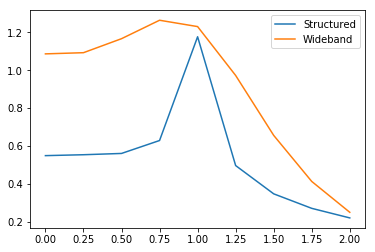

In [56]:
plt.plot(wc,Current, 'C0',label = 'Structured')
plt.plot(wc,FlatCurrent, 'C1',label = 'Wideband')
plt.legend()
plt.show()